<a href="https://colab.research.google.com/github/netomachin/hello-world/blob/main/Enterprise_pricing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

#!pip install colorama
#from colorama import Fore, Style
#from tabulate import tabulate  # Install using `pip install tabulate`

In [ ]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: Load csv

# Assuming your CSV file is in your Google Drive, replace 'path/to/your/file.csv'
# with the actual path to your file.
df = pd.read_csv('/content/drive/MyDrive/Product Management/Customer success/Customer Health Monitoring/CSVs/Customer Health Monitor-data-2025-06-02 12_32_00.csv')
df.rename(columns={'organization_id': 'Company ID'}, inplace=True)


df = df[~df['Company ID'].isin(['9c6b6156-ab05-48df-9079-57cc2069b257','96ef6f04-9de2-4bd3-ad5b-59fbc9add4b3'])].reset_index(drop=True)


#Import relationship between financial product and manin use case
fp_df= pd.read_csv('/content/drive/MyDrive/Product Management/Customer success/Customer Health Monitoring/CSVs/Financial Products - Main Use Case - Relationship - Sheet1.csv')


In [ ]:
#New column in df data set to include main use case
df['Main use case'] = ''
threshold = 15
columns = ['Trade Name', 'MRR', 'Age', 'AR Aging', 'pt_1', 'e_1', 'Main use case', 'pt trend', 'CSM']

In [ ]:
#Populate the column "Main use case" based in "Financial Products" field

for i in range(df.shape[0]):
    # Declare value financial_products and extract from df financial products from the row i
    financial_products = df.loc[i, 'Financial Products']

    # Review that there is no NaN
    if pd.notna(financial_products):  # Check if the value is not NaN
        #print(financial_products.split(', '))

        # Iterate each one of the financial products of row i
        for product in financial_products.split(', '):
            #print(i)
            #print(product)

            # Filter 'Main use case' based on the current product
            main_use_case = fp_df['Main use case'][fp_df['Financial Products'] == product]

            # Check if the filtered DataFrame is not empty
            if not main_use_case.empty:
                #print(main_use_case.iloc[0])

                # Assign the value to the DataFrame
                df.loc[i, 'Main use case'] = main_use_case.iloc[0]

                # Break condition based on 'yes'
                if main_use_case.iloc[0] == 'yes':
                    break
            #else:
                #print(f"No matching main use case found for product: {product}")
    #else:
        #print("Value is NaN or empty")


In [ ]:



"""
Analyzes the trend of pt variables over 3 months.
Returns both individual trends and overall direction.

Parameters:
df: DataFrame containing pt_1, pt_2, pt_3 columns

Returns:
dict: Contains trend analysis and counts
"""


df['pt trend'] = ''
df['pt slope'] = ''

for i in range(len(df)):
  pt_values = [df.iloc[i]['pt_3'], df.iloc[i]['pt_2'], df.iloc[i]['pt_1']]
  #print(df.loc[i, 'Trade Name'])
  #print(pt_values)
  # Given three points
  x = np.array([1, 2, 3])
  y = np.array(pt_values)
  slope, intercept = np.polyfit(x, y, 1)

  df.loc[i, 'pt slope'] = slope
  # Determine overall trend
  if -1 <= slope <= 1:
    df.loc[i, 'pt trend'] = 'steady'
  elif -9 <= slope < -1:
    df.loc[i, 'pt trend'] = 'decrease'
  elif slope < -9:
    df.loc[i, 'pt trend'] = 'large decrease'
  elif 1 < slope < 10:
    df.loc[i, 'pt trend'] = 'increase'
  elif slope >= 10:
    df.loc[i, 'pt trend'] = 'large increase'



In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)



In [ ]:
# Getting cost per Processed Taxpayer
df['Cost per pt'] = df['MRR'] / df['taxpayer_processed_limit']

# Getting cost per Extraction
df['Cost per e'] = df['MRR'] / df['extractions_limit']

# Ratio of number of extractions per processed RFCs
df['Ratio'] = df['extractions_limit'] / df['taxpayer_processed_limit']

In [ ]:
# prompt: scatter plot of df
# x axis -> 'Cost per pt'
# y axis -> 'Cost per e'

price = df[~df['Tier'].isin(['Standard Tier 1', 'Standard Tier 2', 'Standard Tier 3', 'Standard Tier 4', 'Standard Tier 1 - PF', 'Standard Tier 3 - PF', 'Tier Lite '])]
#price = price[price[]]



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company ID                300 non-null    object 
 1   Legal Name                300 non-null    object 
 2   Trade Name                298 non-null    object 
 3   Potential                 37 non-null     object 
 4   Financial Products        287 non-null    object 
 5   Contract End Date         300 non-null    object 
 6   Subscription Start Date   300 non-null    object 
 7   MRR                       300 non-null    int64  
 8   Tier                      300 non-null    object 
 9   taxpayer_processed_limit  300 non-null    int64  
 10  extractions_limit         300 non-null    int64  
 11  AR Aging                  43 non-null     object 
 12  Age                       300 non-null    int64  
 13  CSM                       298 non-null    object 
 14  Total Cond

In [ ]:
price_cols = ['Trade Name', 'Contract End Date','MRR','taxpayer_processed_limit','extractions_limit','Ratio','pt_1', 'e_1','Cost per pt','Cost per e','CSM']
price[price_cols] \
  .sort_values(by=['MRR'], ascending=[False])


,Trade Name,Contract End Date,MRR,taxpayer_processed_limit,extractions_limit,Ratio,pt_1,e_1,Cost per pt,Cost per e,CSM
231,CLARA,false,326500,15000,400000,26.666667,76.30,83.10,21.766667,0.816250,Ana Vite
272,Solvento,2026-01-25,294200,1200,24000,20.000000,24.80,27.90,245.166667,12.258333,Fernanda Toribio
299,Kapital,2025-06-30,197500,2500,75000,30.000000,53.50,59.90,79.000000,2.633333,Fernanda Toribio
297,Fairplay,2026-04-15,178300,2000,40000,20.000000,69.40,49.90,89.150000,4.457500,Fernanda Toribio
49,DAIMLER,2026-01-08,122000,250,7500,30.000000,10.80,3.96,488.000000,16.266667,Fernanda Toribio
295,Uniclick,2024-10-27,118500,2500,10000,4.000000,9.00,15.30,47.400000,11.850000,Ana Vite
40,CREZE,2026-03-19,108000,600,9600,16.000000,74.00,49.80,180.000000,11.250000,Ana Vite
293,Distrito Pyme,2025-09-29,93600,1500,15000,10.000000,103.00,60.10,62.400000,6.240000,Fernanda Toribio
291,Mundi,2026-04-01,84240,3000,7500,2.500000,62.60,96.00,28.080000,11.232000,Jorge De León
266,Jeeves,2024-09-05,82000,1500,24000,16.000000,67.40,59.90,54.666667,3.416667,Fernanda Toribio


In [ ]:
# prompt: export to csv to same directory this file is in -> 'price'

# Export the 'price' DataFrame to a CSV file in the same directory
price[price_cols] \
  .sort_values(by=['Cost per pt'], ascending=[True]) \
  .to_csv('/content/drive/MyDrive/Product Management/pricing strategy/Pricing Enterprise Analysis/Enterprise Cost Analysis.csv', index=False)



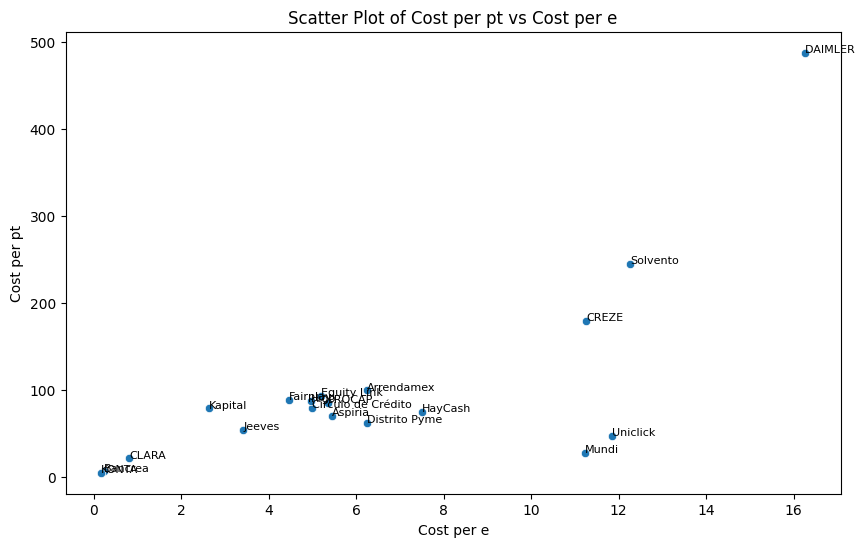

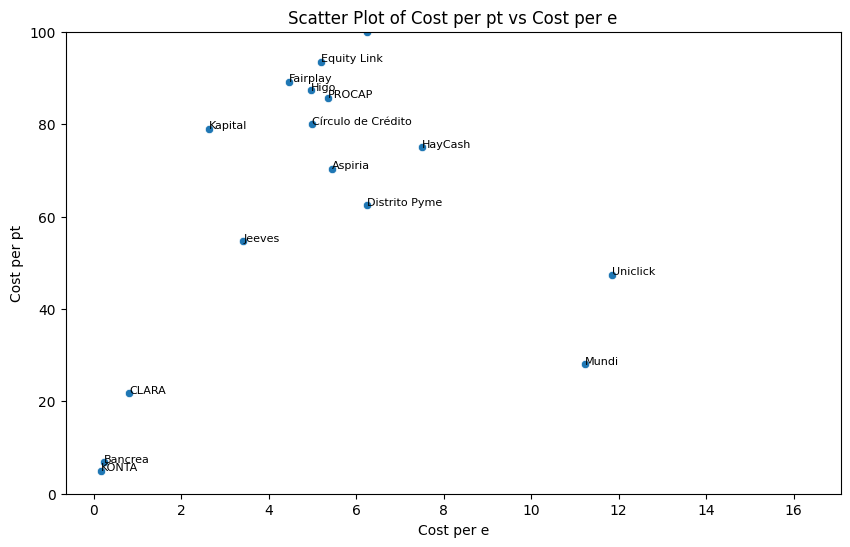

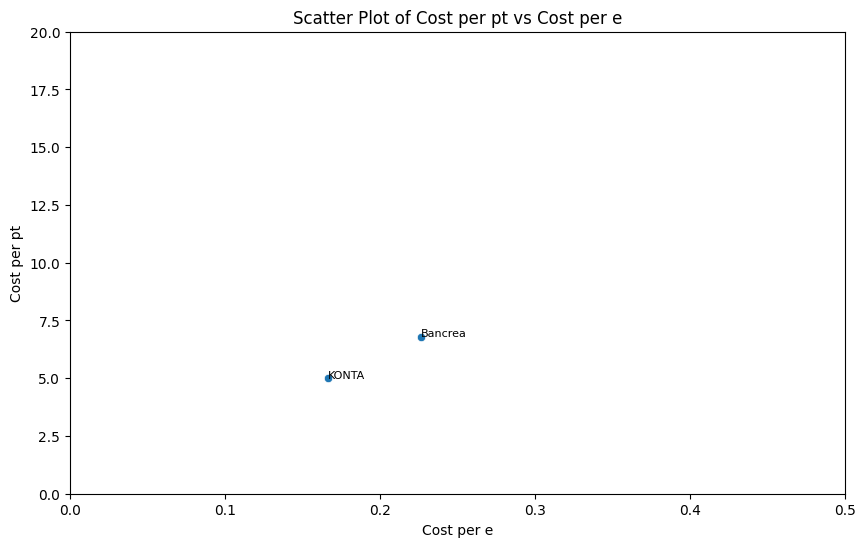

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=price, x='Cost per e', y='Cost per pt')
# Set axis limits
#plt.xlim(0, 50)
#plt.ylim(0, 100)


for i in range(price.shape[0]):
    plt.text(price['Cost per e'].iloc[i], price['Cost per pt'].iloc[i], price['Trade Name'].iloc[i], fontsize=8)
    #plt.text(x, y, s, fontdict=None, withdash=False, **kwargs)


plt.xlabel('Cost per e')
plt.ylabel('Cost per pt')
plt.title('Scatter Plot of Cost per pt vs Cost per e')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=price, x='Cost per e', y='Cost per pt')
# Set axis limits

ylimit = 100
#plt.xlim(0, 50)
plt.ylim(0, ylimit)


for i in range(price.shape[0]):
    if price['Cost per pt'].iloc[i] < ylimit:
      plt.text(price['Cost per e'].iloc[i], price['Cost per pt'].iloc[i], price['Trade Name'].iloc[i], fontsize=8)
    #plt.text(x, y, s, fontdict=None, withdash=False, **kwargs)


plt.xlabel('Cost per e')
plt.ylabel('Cost per pt')
plt.title('Scatter Plot of Cost per pt vs Cost per e')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=price, x='Cost per e', y='Cost per pt')
# Set axis limits

ylimit = 20
plt.xlim(0, .5)
plt.ylim(0, ylimit)


for i in range(price.shape[0]):
    if price['Cost per pt'].iloc[i] < ylimit:
      plt.text(price['Cost per e'].iloc[i], price['Cost per pt'].iloc[i], price['Trade Name'].iloc[i], fontsize=8)
    #plt.text(x, y, s, fontdict=None, withdash=False, **kwargs)


plt.xlabel('Cost per e')
plt.ylabel('Cost per pt')
plt.title('Scatter Plot of Cost per pt vs Cost per e')
plt.show()

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 40 to 299
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company ID                19 non-null     object 
 1   Legal Name                19 non-null     object 
 2   Trade Name                19 non-null     object 
 3   Potential                 18 non-null     object 
 4   Financial Products        19 non-null     object 
 5   Contract End Date         19 non-null     object 
 6   Subscription Start Date   19 non-null     object 
 7   MRR                       19 non-null     int64  
 8   Tier                      19 non-null     object 
 9   taxpayer_processed_limit  19 non-null     int64  
 10  extractions_limit         19 non-null     int64  
 11  AR Aging                  3 non-null      object 
 12  Age                       19 non-null     int64  
 13  CSM                       19 non-null     object 
 14  Total Condusef 

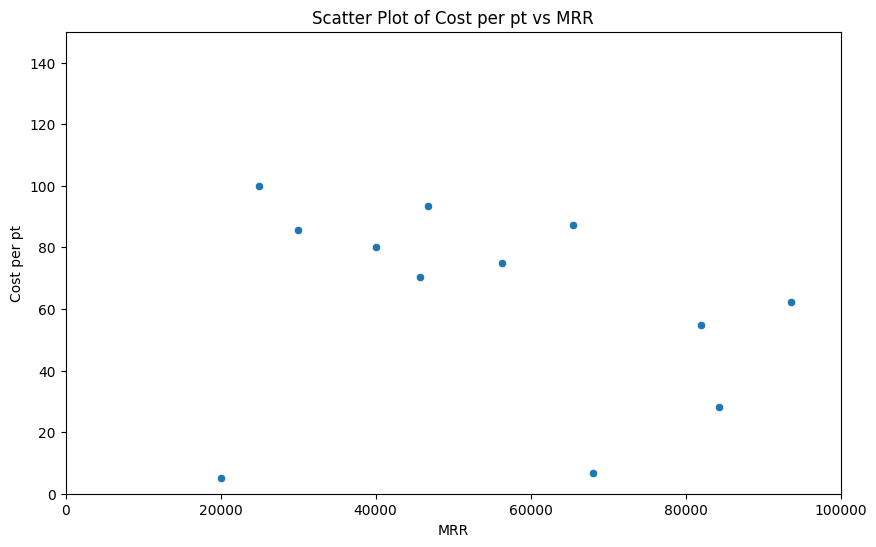

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=price, x='MRR', y='Cost per pt')
# Set axis limits

ylimit = 150
xlimit = 100000
plt.xlim(0, xlimit)
plt.ylim(0, ylimit)


#for i in range(price.shape[0]):
     #if price['MRR'].iloc[i] < xlimit and price['Cost per pt'].iloc[i] < ylimit:
      #plt.text(price['MRR'].iloc[i], price['Cost per pt'].iloc[i], price['Trade Name'].iloc[i], fontsize=8)


plt.xlabel('MRR')
plt.ylabel('Cost per pt')
plt.title('Scatter Plot of Cost per pt vs MRR')
plt.show()

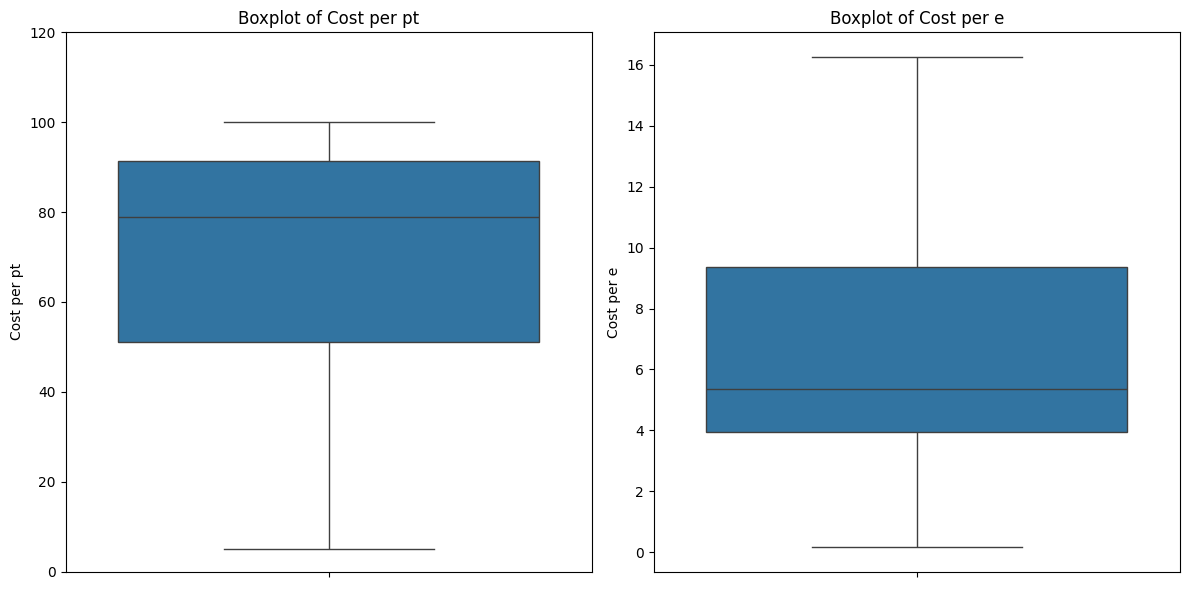

In [ ]:
# prompt: Independet Boxplot charts
# - cost per pt
# - cost per e

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Boxplot for Cost per pt
plt.subplot(1, 2, 1)
sns.boxplot(y=price['Cost per pt'])
plt.title('Boxplot of Cost per pt')
plt.ylabel('Cost per pt')
plt.ylim(0, 120)

# Boxplot for Cost per e
plt.subplot(1, 2, 2)
sns.boxplot(y=price['Cost per e'])
plt.title('Boxplot of Cost per e')
plt.ylabel('Cost per e')

plt.tight_layout()
plt.show()


In [ ]:
price[['Cost per pt','Cost per e']].describe().T


,count,mean,std,min,25%,50%,75%,max
Cost per pt,19.0,99.966433,109.576133,5.000000,51.033333,79.000000,91.325,488.000000
Cost per e,19.0,6.343380,4.421685,0.166667,3.937083,5.357143,9.366,16.266667


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

training_set = price
training_set = training_set[~training_set['Trade Name'].isin(['Solvento','KONTA'])]

# Selecting independent and dependent variables
X = training_set[['taxpayer_processed_limit', 'Ratio']]  # Independent variables
Y = training_set['MRR']  # Dependent variable

# Splitting data into training (80%) and testing (20%) sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [ ]:
training_set[['Trade Name','taxpayer_processed_limit','Ratio','MRR']]

,Trade Name,taxpayer_processed_limit,Ratio,MRR
40,CREZE,600,16.000000,108000
49,DAIMLER,250,30.000000,122000
130,Bancrea,10000,30.000000,68000
211,Arrendamex,250,16.000000,25000
231,CLARA,15000,26.666667,326500
232,Aspiria,650,12.923077,45750
241,Círculo de Crédito,500,16.000000,40000
266,Jeeves,1500,16.000000,82000
269,Higo,750,17.600000,65500
277,HayCash,750,10.000000,56250


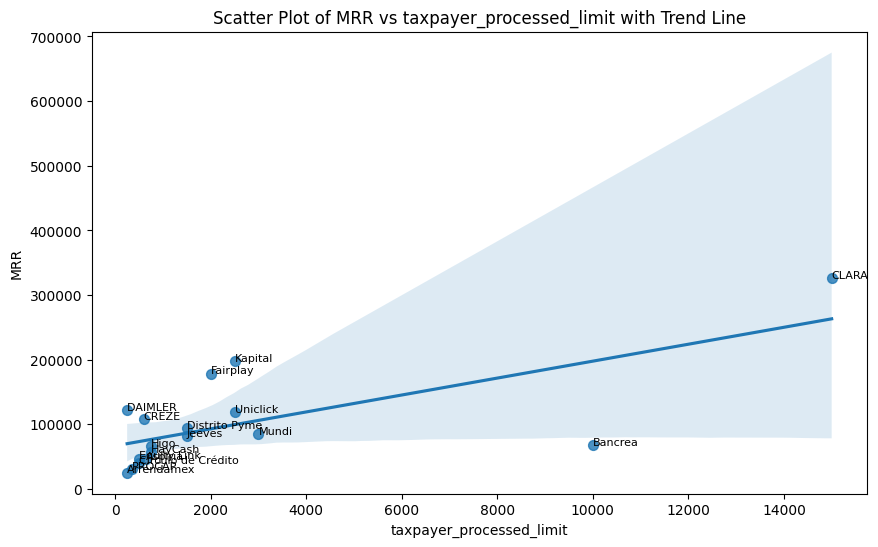

In [ ]:
# prompt: scatter plot training_set
# - y = MRR
# - x = taxpayer_processed_limit
# Include trend line
# add Trade Name data labels

import matplotlib.pyplot as plt
# Assuming 'training_set' DataFrame is already defined and populated as in your provided code.

plt.figure(figsize=(10, 6))
sns.regplot(x='taxpayer_processed_limit', y='MRR', data=training_set, scatter_kws={"s": 50})

for i in range(training_set.shape[0]):
    plt.text(training_set['taxpayer_processed_limit'].iloc[i], training_set['MRR'].iloc[i], training_set['Trade Name'].iloc[i], fontsize=8)

plt.xlabel('taxpayer_processed_limit')
plt.ylabel('MRR')
plt.title('Scatter Plot of MRR vs taxpayer_processed_limit with Trend Line')
plt.show()


In [ ]:
X_test = pd.DataFrame({
    'taxpayer_processed_limit': [30000],
    'Ratio': [16]
})

y_pred = model.predict(X_test)

y_pred

array([420606.16176763])

In [ ]:
# prompt: export to csv df

#df[columns].to_csv('/content/drive/MyDrive/Product Management/Customer success/Customer Health Monitoring/CSVs/Customer_Health_Report.csv', index=False)


In [ ]:

#!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
#!pip install pandoc

#!jupyter nbconvert "/content/drive/MyDrive/Product Management/Customer success/Customer Health Monitoring/Customer Health Monitoring Report/Customer Health Monitoring Report Version 2/Customer Health Report V2.ipynb" --to html


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company ID                300 non-null    object 
 1   Legal Name                300 non-null    object 
 2   Trade Name                298 non-null    object 
 3   Potential                 37 non-null     object 
 4   Financial Products        287 non-null    object 
 5   Contract End Date         300 non-null    object 
 6   Subscription Start Date   300 non-null    object 
 7   MRR                       300 non-null    int64  
 8   Tier                      300 non-null    object 
 9   taxpayer_processed_limit  300 non-null    int64  
 10  extractions_limit         300 non-null    int64  
 11  AR Aging                  43 non-null     object 
 12  Age                       300 non-null    int64  
 13  CSM                       298 non-null    object 
 14  Total Cond

In [ ]:
df[['Trade Name','MRR','taxpayer_processed_limit','extractions_limit','Ratio','pt_1', 'e_1','Cost per pt','Cost per e']][(df['extractions_limit'] > 2000) & (df['e_1'] > 50)]

,Trade Name,MRR,taxpayer_processed_limit,extractions_limit,Ratio,pt_1,e_1,Cost per pt,Cost per e
88,Engen Capital,22000,200,3200,16.000000,69.0,83.7,110.000000,6.875000
211,Arrendamex,25000,250,4000,16.000000,121.0,54.1,100.000000,6.250000
222,KONTA,20000,4000,120000,30.000000,106.0,117.0,5.000000,0.166667
231,CLARA,326500,15000,400000,26.666667,76.3,83.1,21.766667,0.816250
266,Jeeves,82000,1500,24000,16.000000,67.4,59.9,54.666667,3.416667
269,Higo,65500,750,13200,17.600000,50.9,98.4,87.333333,4.962121
271,BLU CAPITAL,22000,200,3200,16.000000,142.0,58.8,110.000000,6.875000
291,Mundi,84240,3000,7500,2.500000,62.6,96.0,28.080000,11.232000
293,Distrito Pyme,93600,1500,15000,10.000000,103.0,60.1,62.400000,6.240000
299,Kapital,197500,2500,75000,30.000000,53.5,59.9,79.000000,2.633333


In [ ]:
df['e total'] = df['e_1'] * df['extractions_limit']/100

In [ ]:
df[['Trade Name','MRR','taxpayer_processed_limit','extractions_limit','Ratio','pt_1', 'e_1', 'e total','Cost per pt','Cost per e']][(df['e total'] > 4000)]

,Trade Name,MRR,taxpayer_processed_limit,extractions_limit,Ratio,pt_1,e_1,e total,Cost per pt,Cost per e
40,CREZE,108000,600,9600,16.000000,74.0,49.8,4780.8,180.000000,11.250000
222,KONTA,20000,4000,120000,30.000000,106.0,117.0,140400.0,5.000000,0.166667
231,CLARA,326500,15000,400000,26.666667,76.3,83.1,332400.0,21.766667,0.816250
266,Jeeves,82000,1500,24000,16.000000,67.4,59.9,14376.0,54.666667,3.416667
269,Higo,65500,750,13200,17.600000,50.9,98.4,12988.8,87.333333,4.962121
272,Solvento,294200,1200,24000,20.000000,24.8,27.9,6696.0,245.166667,12.258333
291,Mundi,84240,3000,7500,2.500000,62.6,96.0,7200.0,28.080000,11.232000
293,Distrito Pyme,93600,1500,15000,10.000000,103.0,60.1,9015.0,62.400000,6.240000
297,Fairplay,178300,2000,40000,20.000000,69.4,49.9,19960.0,89.150000,4.457500
299,Kapital,197500,2500,75000,30.000000,53.5,59.9,44925.0,79.000000,2.633333
